## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора.ipynb_checkpoints/СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

In [ ]:
!python download_data.py

### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('election_results.csv')

- явку (%) по всем ТИК, результат отсортировать по убыванию

In [2]:
((df.groupby('ТИК')['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'].sum() +
  df.groupby('ТИК')['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования'].sum()) /
  df.groupby('ТИК')['Число избирателей, внесенных в список избирателей на момент окончания голосования'].sum())\
  .sort_values(ascending=False)

ТИК
Цифровые избирательные участки                0.747664
Территориальная избирательная комиссия №18    0.507381
Территориальная избирательная комиссия №15    0.400074
Территориальная избирательная комиссия №13    0.396455
Территориальная избирательная комиссия №19    0.376655
Территориальная избирательная комиссия №8     0.360056
Территориальная избирательная комиссия №20    0.337091
Территориальная избирательная комиссия №9     0.332639
Территориальная избирательная комиссия №22    0.323727
Территориальная избирательная комиссия №2     0.316594
Территориальная избирательная комиссия №1     0.313022
Территориальная избирательная комиссия №10    0.304767
Территориальная избирательная комиссия №29    0.304189
Территориальная избирательная комиссия №4     0.303324
Территориальная избирательная комиссия №21    0.290828
Территориальная избирательная комиссия №7     0.289317
Территориальная избирательная комиссия №25    0.288585
Территориальная избирательная комиссия №17    0.282107
Террит

- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)

In [3]:
candidate = 'Беглов Александр Дмитриевич'

candidate_share = df[candidate] / df[['Амосов Михаил Иванович',
                                      'Беглов Александр Дмитриевич',
                                      'Тихонова Надежда Геннадьевна',
                                      'Число недействительных избирательных бюллетеней']].sum(axis=1)

candidate_share = candidate_share[df['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] +
                                  df['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования'] > 100]

max_result = candidate_share[candidate_share == candidate_share.max()]
f"УИК №{df.iloc[max_result.index[0]]['УИК']}", max_result.values[0]

('УИК №343.0', 0.9795628725518024)

- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна


In [4]:
uik_turnout = (df['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] +
               df['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования']) /\
              df['Число избирателей, внесенных в список избирателей на момент окончания голосования']

df['Явка'] = uik_turnout

(df.groupby('ТИК')['Явка'].max() - df.groupby('ТИК')['Явка'].min()).sort_values(ascending=False).head(1)

ТИК
Территориальная избирательная комиссия №17    0.82042
Name: Явка, dtype: float64

- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)


In [5]:
df.groupby('ТИК')['Явка'].var()

ТИК
Территориальная избирательная комиссия №1     0.019176
Территориальная избирательная комиссия №10    0.007428
Территориальная избирательная комиссия №11    0.024049
Территориальная избирательная комиссия №12    0.003220
Территориальная избирательная комиссия №13    0.039352
Территориальная избирательная комиссия №14    0.003146
Территориальная избирательная комиссия №15    0.041623
Территориальная избирательная комиссия №16    0.011306
Территориальная избирательная комиссия №17    0.033070
Территориальная избирательная комиссия №18    0.024045
Территориальная избирательная комиссия №19    0.020498
Территориальная избирательная комиссия №2     0.046172
Территориальная избирательная комиссия №20    0.017360
Территориальная избирательная комиссия №21    0.031005
Территориальная избирательная комиссия №22    0.045146
Территориальная избирательная комиссия №23    0.059075
Территориальная избирательная комиссия №24    0.027265
Территориальная избирательная комиссия №25    0.000844
Террит

- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат


In [6]:
candidates = ['Амосов Михаил Иванович', 'Беглов Александр Дмитриевич', 'Тихонова Надежда Геннадьевна']

results = {}

for candidate in candidates:
    candidate_share = df[candidate] / df[['Амосов Михаил Иванович',
                                          'Беглов Александр Дмитриевич',
                                          'Тихонова Надежда Геннадьевна',
                                          'Число недействительных избирательных бюллетеней']].sum(axis=1)

    results[candidate] = (candidate_share * 100).astype(int).value_counts()

results['Амосов Михаил Иванович']

15    157
16    147
13    146
17    143
14    138
12    122
18    108
11    106
19     97
10     83
20     82
9      75
21     74
8      64
22     55
23     52
24     49
26     38
7      34
25     33
6      29
5      24
27     20
29     19
28     17
3      12
30     10
4       9
0       5
31      5
32      4
2       4
1       4
35      3
34      2
41      1
48      1
dtype: int64

- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

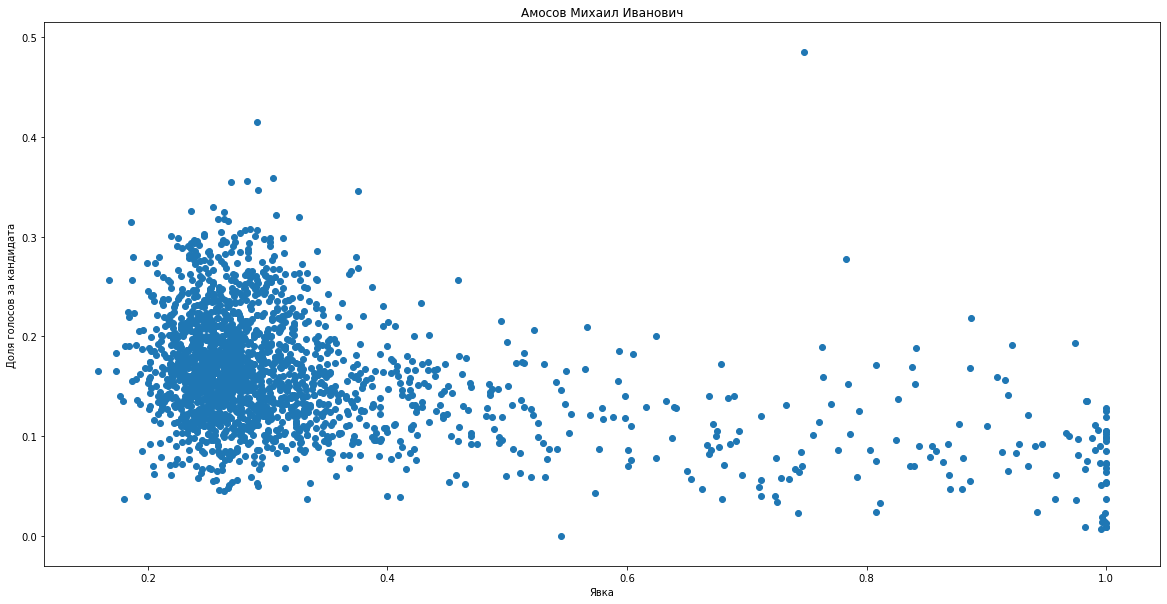

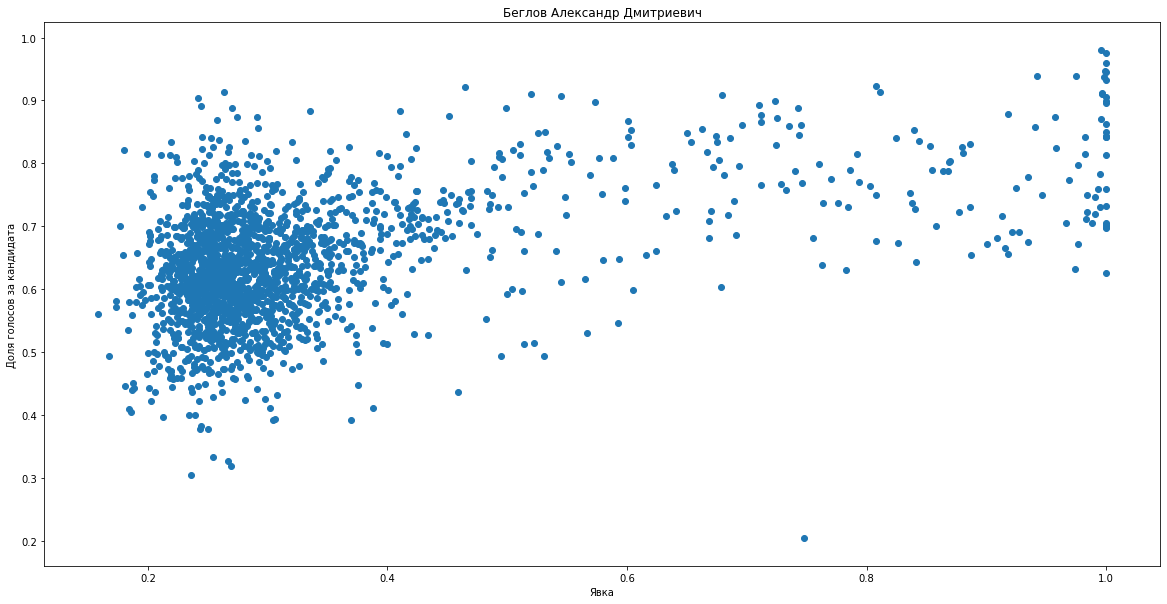

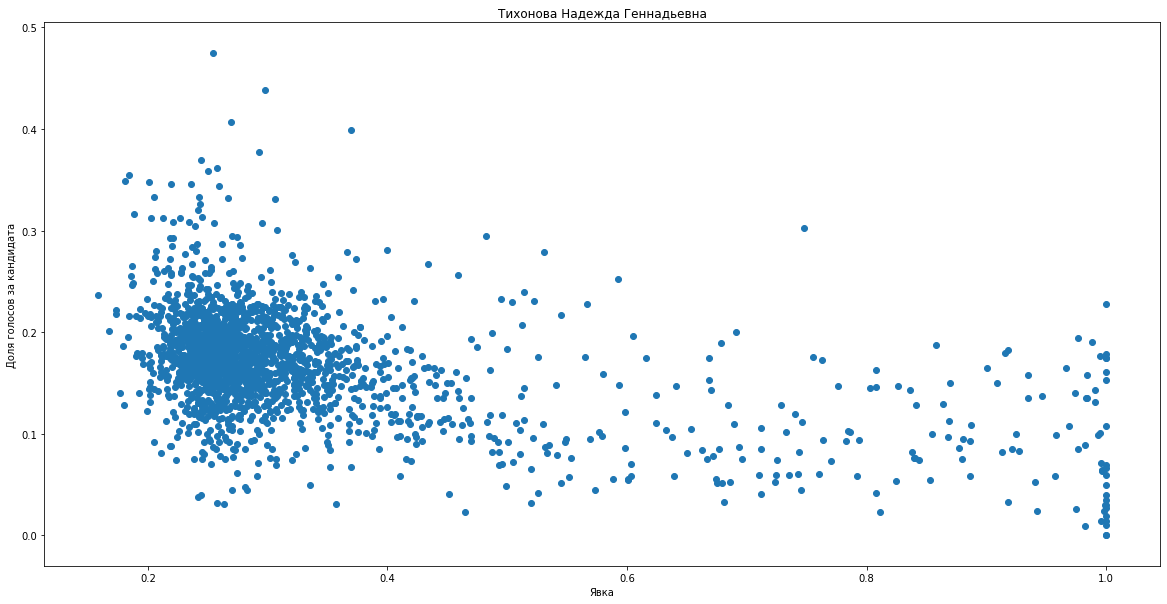

In [7]:
for candidate in candidates:
    candidate_share = df[candidate] / df[['Амосов Михаил Иванович',
                                          'Беглов Александр Дмитриевич',
                                          'Тихонова Надежда Геннадьевна',
                                          'Число недействительных избирательных бюллетеней']].sum(axis=1)


    plt.figure(figsize=(20,10))
    plt.scatter(df['Явка'], candidate_share)
    plt.title(candidate)
    plt.xlabel('Явка')
    plt.ylabel('Доля голосов за кандидата')
    plt.show()